In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_data(file_name: str):
    with open(file_name) as f:
        columns = f.readline().split()
        text = f.read()

    data = [
        row.split(" ")
        for row in text.split("\n")
    ]
    for i, row in enumerate(data):
        for j in range(4):
            row[j] = int(row[j])
        row[4] = float(row[4])
    return pd.DataFrame(data, columns=columns)

In [ ]:
row_data = get_data("column_data.txt")
row_data

In [51]:
x_axis = range(1, 9)
y_axis = row_data[(row_data.lsize == 1024) & (row_data.msize == 1024) & (row_data.rsize == 1024)].time
y_axis

504    5.699823
505    3.759737
506    2.845423
507    2.526073
508    2.253863
509    2.196998
510    2.044869
511    2.095000
Name: time, dtype: float64

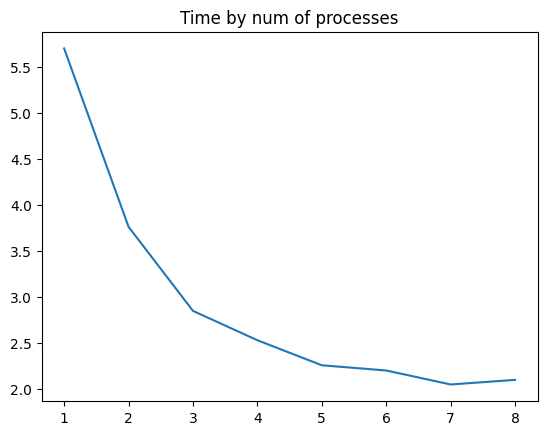

In [52]:
plt.plot(x_axis, y_axis)
plt.title('Time by num of processes')
plt.show()

In [53]:
equal_size_data = row_data[(row_data.lsize == row_data.msize) & (row_data.msize == row_data.rsize)]
equal_size_data[equal_size_data.processes == 1]

,processes,lsize,msize,rsize,time
0,1,8,8,8,0.000047
168,1,64,64,64,0.001249
336,1,256,256,256,0.090620
504,1,1024,1024,1024,5.699823


In [54]:
equal_size_data[equal_size_data.processes == 5]

,processes,lsize,msize,rsize,time
4,5,8,8,8,0.000357
172,5,64,64,64,0.001051
340,5,256,256,256,0.042336
508,5,1024,1024,1024,2.253863


In [55]:
a = equal_size_data[equal_size_data.processes == 1].time.divide(equal_size_data[equal_size_data.processes == 5].time.values)
a

0      0.131653
168    1.188392
336    2.140495
504    2.528913
Name: time, dtype: float64

In [56]:
a / 5

0      0.026331
168    0.237678
336    0.428099
504    0.505783
Name: time, dtype: float64

In [57]:
time_by_num_proc = equal_size_data[(row_data.lsize == 1024) & (row_data.msize == 1024) & (row_data.rsize == 1024)].time
time_by_num_proc

C:\Users\dimit\AppData\Local\Temp\ipykernel_15100\2916614139.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  time_by_num_proc = equal_size_data[(row_data.lsize == 1024) & (row_data.msize == 1024) & (row_data.rsize == 1024)].time


504    5.699823
505    3.759737
506    2.845423
507    2.526073
508    2.253863
509    2.196998
510    2.044869
511    2.095000
Name: time, dtype: float64

In [58]:
a = (time_by_num_proc.iloc[0] / time_by_num_proc).reset_index(drop=True)
a

0    1.000000
1    1.516016
2    2.003155
3    2.256397
4    2.528913
5    2.594369
6    2.787378
7    2.720679
Name: time, dtype: float64

In [59]:
a / (a.index + 1)

0    1.000000
1    0.758008
2    0.667718
3    0.564099
4    0.505783
5    0.432395
6    0.398197
7    0.340085
dtype: float64

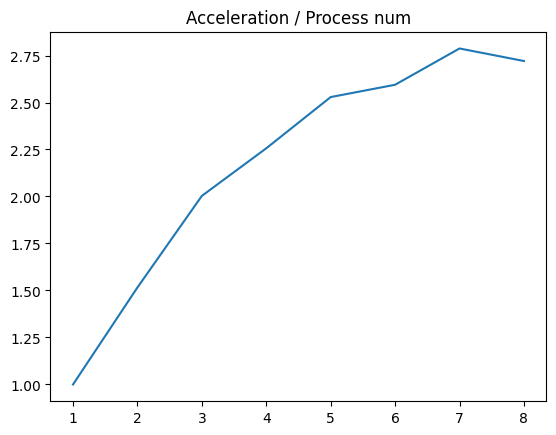

In [60]:
plt.plot(range(1, 9), a)
plt.title('Acceleration / Process num')
plt.show()

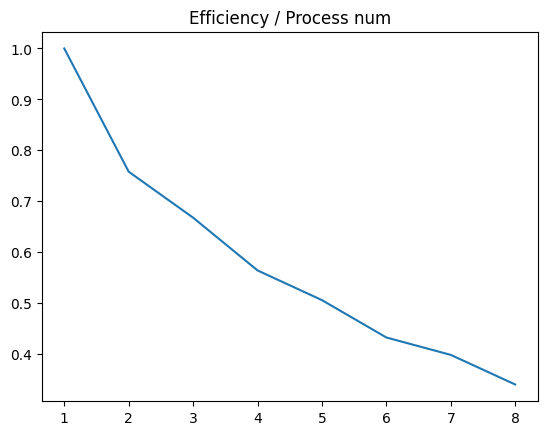

In [61]:
plt.plot(range(1, 9), a / (a.index + 1))
plt.title('Efficiency / Process num')
plt.show()